In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.optimize
pi = np.pi

In [2]:
url = 'https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/galaxies_orig.csv'
galaxies = pandas.read_csv(url)
galaxies = galaxies['velocity'].values
galaxies[:10], len(galaxies)

(array([23706,  9350,  9483, 23484, 21921, 34279, 24366, 22242, 23542,
        24129]),
 120)

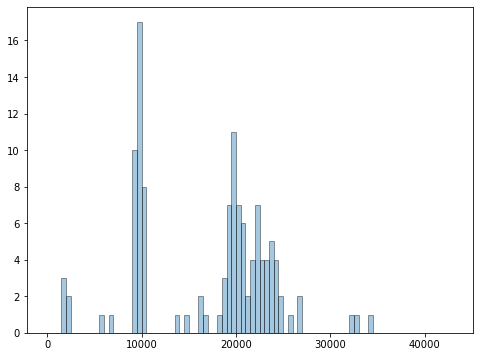

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.hist(galaxies, bins=np.linspace(0,43000,87), alpha=.4, ec='black')
plt.show()

<ipython-input-9-878d4c79ee25>:5: RuntimeWarning: divide by zero encountered in log
  return np.log(lik)
/Users/sophiechiang/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:734: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


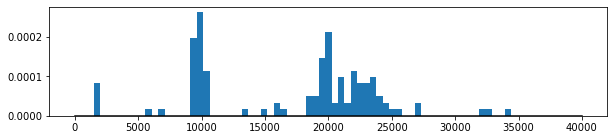

In [9]:
def loglik(x,Θ):
    p1,p2,p3,μ1,μ2,μ3,σ1,σ2,σ3 = Θ
    φ = scipy.stats.norm.pdf
    lik = p1 * φ(x,loc=μ1,scale=σ1) + p2 * φ(x,loc=μ2,scale=σ2) + p3 * φ(x,loc=μ3,scale=σ3)
    return np.log(lik)

initial_guess = [0,0,0,10000,20000,24000,np.log(1000),np.log(5000),np.log(8000)]
Θhat = scipy.optimize.fmin(lambda Θ: -np.sum(loglik(galaxies, Θ)), initial_guess, maxiter=5000)
fig,ax = plt.subplots(figsize=(10,2))
x = np.linspace(0,40000,200)
f = np.exp(loglik(x,Θhat))
ax.plot(x,f,color="black")
ax.hist(galaxies, bins=np.linspace(0,40000,80), density=True)
plt.show()

Optimization terminated successfully.
         Current function value: 1152.253635
         Iterations: 1927
         Function evaluations: 2840


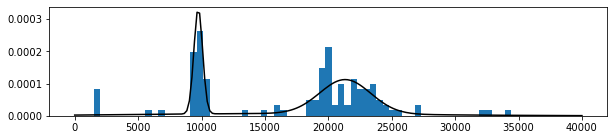

In [10]:
def transform(Θ):
    q1,q2,q3,μ1,μ2,μ3,t1,t2,t3 = Θ
    p = np.exp([q1,q2,q3])
    p1,p2,p3 = p/ np.sum(p)
    σ1,σ2,σ3 = np.exp([t1,t2,t3])
    return p1,p2,p3,μ1,μ2,μ3,σ1,σ2,σ3

def loglik(x, Θ):
    p1,p2,p3,μ1,μ2,μ3,σ1,σ2,σ3 = transform(Θ)
    φ = scipy.stats.norm.pdf
    lik = p1 * φ(x,loc=μ1,scale=σ1) + p2 * φ(x,loc=μ2,scale=σ2) + p3 * φ(x,loc=μ3,scale=σ3)
    return np.log(lik)

initial_guess = [0,0,0,10000,20000,24000,np.log(1000),np.log(5000),np.log(8000)]
Θhat = scipy.optimize.fmin(lambda Θ: -np.sum(loglik(galaxies, Θ)), initial_guess, maxiter=5000)
fig,ax = plt.subplots(figsize=(10,2))
x = np.linspace(0,40000,200)
f = np.exp(loglik(x,Θhat))
ax.plot(x,f,color="black")
ax.hist(galaxies, bins=np.linspace(0,40000,80), density=True)
plt.show()

Optimization terminated successfully.
         Current function value: 1.968245
         Iterations: 15
         Function evaluations: 30
[1.73206858]


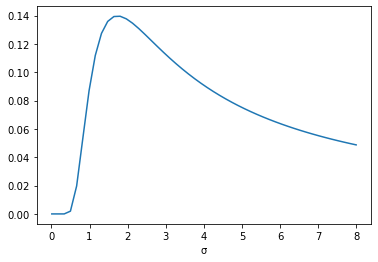

In [25]:
def transform(t):
    σ = np.exp(t)
    return σ
    
def loglik(t):
    σ = transform(t)
    return np.log((1/np.sqrt(2*pi*np.power(σ,2)))) + (-3/(2*np.power(σ,2)))

that = scipy.optimize.fmin(lambda t: -loglik(t), 1, maxiter=3000)
σhat = np.exp(that)
print(σhat)

fig,ax = plt.subplots()
σ =np.linspace(.01, 8,50)
ax.plot(σ, np.exp(loglik(np.log(σ))))
ax.set_xlabel('σ')
plt.show()

In [38]:
def transform(Θ):
    q1,q2,q3 =Θ
    p = np.exp([q1,q2,q3])
    p1,p2,p3 = p/np.sum(p)
    return p1,p2,p3

def loglik(Θ):
    p1,p2,p3 = transform(Θ)
    return 0.2*np.log(p1) + 0.5*np.log(p2) + 0.3*np.log(p3)

Θhat = scipy.optimize.fmin(lambda Θ: -loglik(Θ), [np.log(2),np.log(3),np.log(4)], maxiter=3000)
p = np.exp(Θhat)
p1hat, p2hat,p3hat = np.exp(Θhat) / np.sum(p)
print(p1hat, p2hat, p3hat)

Optimization terminated successfully.
         Current function value: 1.029653
         Iterations: 53
         Function evaluations: 97
0.2000020850081333 0.49999396995861656 0.3000039450332502


In [39]:
url = 'https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/xkcd.csv'
df = pandas.read_csv(url)
x,y = df.x, df.y

Optimization terminated successfully.
         Current function value: 215.903466
         Iterations: 78
         Function evaluations: 150
ahat:1.621,bhat:0.487.


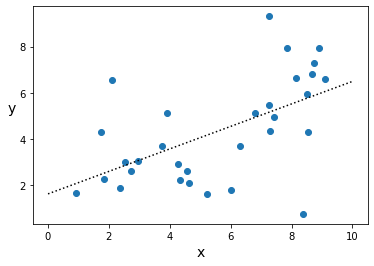

In [42]:
def loglik(Y,X,Θ):
    s = scipy.stats.norm.pdf
    a,b = Θ
    sigma = 0.5
    return np.log(s(Y, loc=a+b*X, scale=sigma))

initial_guess = [0,1]
ahat, bhat = scipy.optimize.fmin(lambda Θ: -np.sum(loglik(y,x,Θ)), initial_guess, maxiter=5000)
print(f"ahat:{ahat:.3f},bhat:{bhat:.3f}.")
fig,ax = plt.subplots(figsize=(6,4))
xnew = np.linspace(0,10,100)
ax.plot(xnew, ahat+bhat*xnew, linestyle='dotted', color='black')
ax.scatter(x, y)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14, rotation='horizontal', ha='right')
plt.show()

In [44]:
model = sklearn.linear_model.LinearRegression()
features = np.column_stack([x])
model.fit(features, y)
ahat,bhat = model.intercept_, model.coef_[0]
print(f"ahat:{ahat:.3f},bhat:{bhat:.3f}.")

ahat:1.621,bhat:0.487.
